## **Introduction to Image Processing, Computer Vision and Deep Learning**
- Project-2
- 2023/12/22

### Table of Contents：
1. **Hough Circle Transform**	 
    - 1.1 Draw Contour
    - 1.2 Count Rings
2. **Histogram Equalization**
3. **Morphology Operation**
    - 3.1 Closing
    - 3.2 Opening


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 22 14:38:43 2023
@author: Mr.Jiang
"""
import cv2
import numpy as np
from numpy import zeros, dot, exp, mgrid, pi, ravel, uint8, square
# from PyQt5.QtWidgets import QApplication, QMainWindow, QLabel, QPushButton, QPlainTextEdit, QLineEdit, QGraphicsView, QGraphicsScene, QFileDialog
# from PyQt5.QtGui import QIcon, QPixmap
# from PyQt5.QtCore import Qt
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torchvision.models import vgg19_bn, resnet50
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
import torch.optim as optim
import torchvision.models as models
from sklearn.model_selection import train_test_split
from IPython.display import display, Image
from PIL import Image as PILImage
import random
import sys
import io


In [ ]:
# run on Kaggle
import os

# Kaggle input / working
os.listdir("/kaggle/working/") # reset
print(os.listdir('/kaggle/input/hw2-q5-inference-dataset/Hw2_Q5_inference_dataset/'))


1.1 Buttom clicked
image shape：(118, 255, 3)


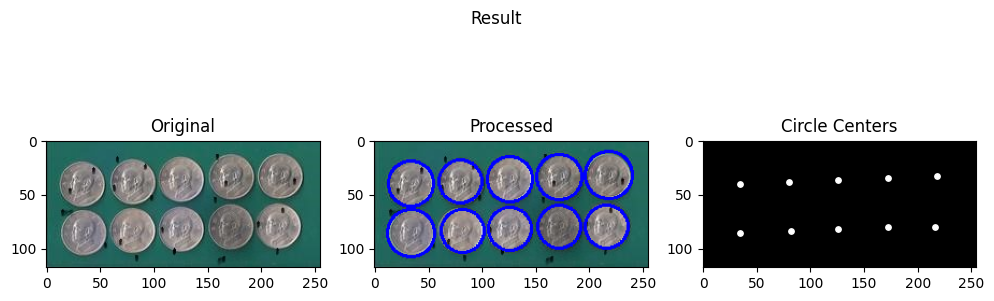

In [75]:
# 1.1 Draw Contour--------------------------------------------------------

class Q11():
    def Draw_Contour():
        print("1.1 Buttom clicked")
        image = cv2.imread('/kaggle/input/dataset-opencvdl-hw2/Dataset_OpenCvDl_Hw2/Dataset_OpenCvDl_Hw2/Q1/coins.jpg')

        if image is not None:
            print(f"image shape：{image.shape}")
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            blurred = cv2.GaussianBlur(gray, (9, 9), 0)

            # inspect circles
            circles = cv2.HoughCircles(
                blurred, # for improving accuracy, usually get blurred first to reduce noise
                cv2.HOUGH_GRADIENT,
                dp=1,
                minDist=30,
                param1=50,
                param2=30,
                minRadius=10,
                maxRadius=50
            )

            '''
            cv2.HoughCircles() inspect circles calculate by gradient
            circles 是三維 np.ndarray
                - 第一維度表示偵測到的圓形集合
                - 第二維度表示每個圓形的參數
                - 第三維度表示每個圓形的參數值 (x, y, r)

            Ex. circles = [[[100, 150, 30],  # 第一個圓形：圓心 (100, 150)，半徑 30
                            [250, 200, 40],  # 第二個圓形：圓心 (250, 200)，半徑 40
                            [400, 300, 50]]] # 第三個圓形：圓心 (400, 300)，半徑 50
                circles.shpae = (1,3,3)
            '''
            # circles[0] 降維 circles.shpae = (1,10,3) -> (10,3)
            if circles is not None:
                circles = np.round(circles[0]).astype("int")

            # draw circles
            for (x, y, r) in circles:
                processed_image = cv2.circle(image, (x, y), r,(255, 0, 0), 2)
            '''
            cv2.circle(...) 在影像上繪製圓形
                - image: target
                - (255, 0, 0): 顏色，以 BGR 格式表示，(255, 0, 0) 代表藍色
                - 2: 圓形邊緣線條粗細，以像素為單位
                - 會直接修改傳入的 image
            '''
            # recover image
            image = cv2.imread('/kaggle/input/dataset-opencvdl-hw2/Dataset_OpenCvDl_Hw2/Dataset_OpenCvDl_Hw2/Q1/coins.jpg')

            # set a 118 x 255 / 3 channal = 0 black_image
            black_image = np.zeros((118, 255, 3), dtype=np.uint8)

            # display
            plt.figure(figsize=(12, 4))

            '''
            OpenCV channel: BGR
            Matplotlib.imshow() channel: RGB -> need cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            '''

            # 1,3,1 mean 1 row 3 col first subplot
            plt.subplot(1,3,1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original')
            plt.subplot(1,3,2), plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)), plt.title('Processed')
            plt.subplot(1,3,3), plt.imshow(cv2.cvtColor(black_image, cv2.COLOR_BGR2RGB)), plt.title('Circle Centers')
            plt.scatter(circles[:, 0], circles[:, 1], c='white', marker='o' ,s=15)
            fig = plt.gcf()
            fig.suptitle("Result")
            plt.show()

        else:
            print("請先選擇圖片")

q11 = Q11()
Q11.Draw_Contour()


1.2 Buttom clicked
Coin counts：1
Coin counts：2
Coin counts：3
Coin counts：4
Coin counts：5
Coin counts：6
Coin counts：7
Coin counts：8
Coin counts：9
Coin counts：10
There are 10 coins in the image.


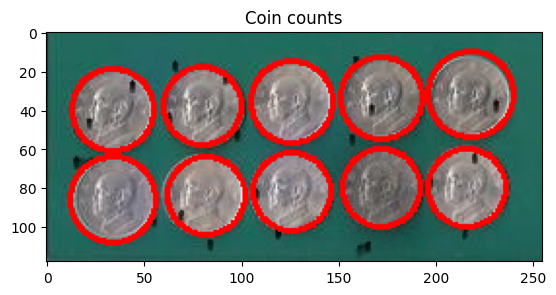

In [79]:
# 1.2 Count Coins--------------------------------------------------------

class Q12():
    def Count_Coins(self):
        print("1.2 Buttom clicked")
        image = cv2.imread('/kaggle/input/dataset-opencvdl-hw2/Dataset_OpenCvDl_Hw2/Dataset_OpenCvDl_Hw2/Q1/coins.jpg')

        if image is not None:
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            blurred = cv2.GaussianBlur(gray, (9, 9), 0)

            # THRESH_BINARY
            # _, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)
            '''
            cv2.threshold()
                - blurred: input
                - 100: threshold。
                - 255: max for all pixel > threshold
                - cv2.THRESH_BINARY: 表示二值閾值處理，將像素值分為兩類：1.< threshold / 2.=> threshold
            '''

            # inspect contours
            # contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            '''
            cv2.findContours()
                - cv2.RETR_EXTERNAL：只檢索最外層的輪廓
                - cv2.CHAIN_APPROX_SIMPLE：壓縮水平、垂直和對角線段，只保留端點
            '''

            # inspect contours
            circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=10, maxRadius=50)
            if circles is not None:
                circles = np.round(circles[0, :]).astype("int")

            coin_count = 0 # initialize
            for (x, y, r) in circles:
                processed_image = cv2.circle(image, (x, y), r,(0, 0, 255), 2)
                coin_count += 1
                print(f"Coin counts：{coin_count}")

            # display
            print("There are {} coins in the image.".format(coin_count))
            plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)), plt.title('Coin counts')
            plt.show

        else:
            print("請先選擇圖片")

q12 = Q12()
q12.Count_Coins()


### **機率密度函數（PDF）vs. 累積分佈函數（CDF）**

1. **PDF（Probability Density Function）**描述一個連續隨機變數在某個數值附近出現的相對可能性。對於離散變數，對應的概念是**機率質量函數（PMF, Probability Mass Function）**。

    - **應用**：
        1. 在影像處理中，PDF 可用來**分析像素強度的分佈**，**描述影像中每個像素亮度的相對頻率**，如：直方圖均衡化（Histogram Equalization）
        2. 在機器學習中，PDF 可幫助**建模變數的機率分佈**，如：高斯分佈應用於 Naïve Bayes classifier

2. **CDF（Cumulative Distribution Function）** 描述**隨機變數 X <= 某個值 x 的機率**。

    - **應用**
        1. 在影像處理中，CDF 可用於直方圖均衡化，**均衡化像素強度，使影像的亮度分佈更均勻**
        3. 在統計學中，CDF 可用來計算分位數（quantiles）
        4. 在機器學習中，CDF 可用來計算特定範圍內變數的機率，如： Gaussian Naïve Bayes classifier

3. **圖像處理中的 PDF 和 CDF**
- 在影像處理領域，PDF 和 CDF 經常用於直方圖均衡化（Histogram Equalization）：
    - PDF（像素強度分佈）：描述變數取某個值的機率密度，在影像處理中對應於**灰度直方圖**，描述影像中每個像素亮度的相對頻率。
    - CDF（累積機率）：描述變數小於某個值的累積機率，在影像處理中用於**直方圖均衡化**，用於均衡化像素強度，使影像對比度更均勻。

- **步驟**：
    1. **計算影像灰階直方圖（PDF）**。
    2. **根據 PDF 計算 CDF**。
    3. **使用 CDF 對影像進行像素映射，使亮度分佈更均勻**。


2. Buttom clicked
image shape：(827, 1300, 3)


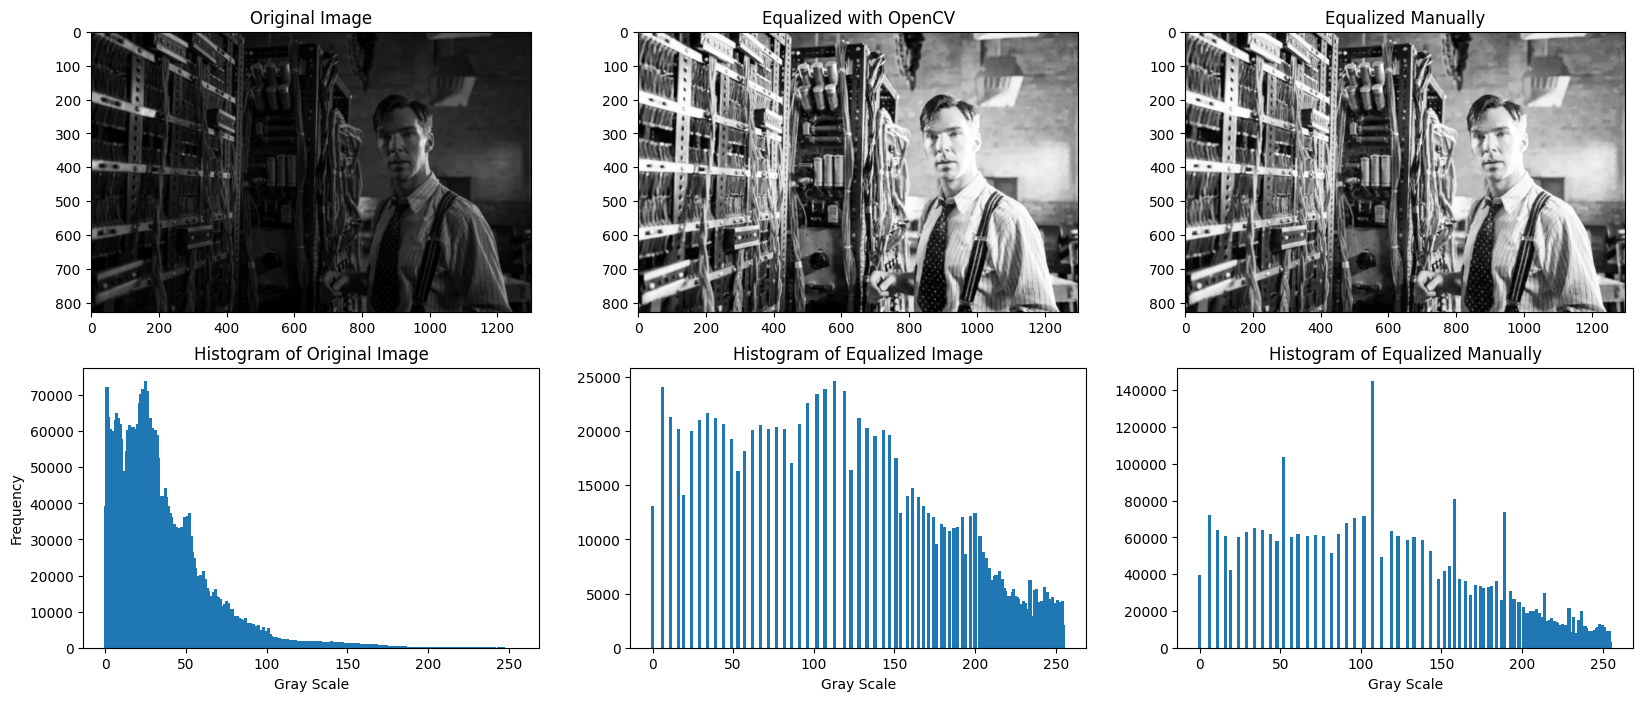

In [17]:
# 2. Histogram Equalization----------------------------------------------

class Q2():
    def Histogram_Equalization(self):
        print("2. Buttom clicked")
        image = cv2.imread('/kaggle/input/dataset-opencvdl-hw2/Dataset_OpenCvDl_Hw2/Dataset_OpenCvDl_Hw2/Q2/histoEqualGray2.png')

        if image is not None:
            print(f"image shape：{image.shape}") # (827, 1300, 3)
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # display
            plt.figure(figsize=(20, 8))

            # Origine--------------------------------------------------------------------------

            # origine subplot(2, 3, 1)
            plt.subplot(2, 3, 1)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title('Original Image')

            # histogram of origine subplot(2, 3, 4)
            plt.subplot(2, 3, 4)
            hist_original, bins_original = np.histogram(image.flatten(), 256)
            '''
            np.histogram(a, bins=10, range=None, normed=None, weights=None, density=None)
                - image.flatten(): covert image to 1 shape(hight * width * channel) ndarray for inputting np.histogram()
                - 256：直方圖的 bins(colors) 區間數量 0 ~ 255
                - hist_original: ndarray, for all bins(colors) counts(pixels)
                - bins_original: ndarrau, for all bins(colors) board values

            hist_original = [39351 72195 64041 60639 42297 60039 63108 64974 63765 61953 57960 48990
                                 0 54645 60411 61626 60681 61221 60741 51276 61890 67887 70359 71802
                               ......
                               111   102    57     0    69    63    54    75    24    21    27    33
                                33    30    15     9]
            '''

            plt.bar(range(256), hist_original, width=2)
            plt.xlabel("Gray Scale")
            plt.ylabel("Frequency")
            plt.title('Histogram of Original Image')

            # Equalized----------------------------------------------------------------------------

            # cv2.equalizeHist()
            equalized_image_opencv = cv2.equalizeHist(gray_image)
            '''
            cv2.equalizeHist() 增強影像對比度
            重新分配影像的像素值，使得影像的直方圖更加均勻分布，從而使影像的亮度和對比度更加均衡
            '''

            # Equalized with OpenCV subplot(2, 3, 2)
            plt.subplot(2, 3, 2)
            plt.imshow(cv2.cvtColor(equalized_image_opencv,cv2.COLOR_BGR2RGB))
            plt.title('Equalized with OpenCV')

            # histogram of equalized subplot(2, 3, 5)
            plt.subplot(2, 3, 5)
            hist_equalized_opencv, bins_equalized_opencv = np.histogram(equalized_image_opencv.flatten(), 256)
            plt.bar(range(256), hist_equalized_opencv, width=2)
            plt.xlabel("Gray Scale")
            # plt.ylabel("Frequency")
            plt.title('Histogram of Equalized Image')

            # Equalize manually----------------------------------------------------------------

            # calculate PDF and CDF
            pdf_original = hist_original / sum(hist_original)
            cdf_original = np.cumsum(pdf_original)
            lookup_table = np.round(255 * cdf_original).astype(np.uint8) # np.round() 四捨五入
            '''
            pdf_original = [ 1.22007255e-02 2.23839643e-02 1.98558274e-02 1.88010418e-02
                             1.31141289e-02 1.86150126e-02 1.95665519e-02 2.01451028e-02
                             ......
                             7.44116826e-06 6.51102223e-06 8.37131430e-06 1.02316064e-05
                             1.02316064e-05 9.30146033e-06 4.65073016e-06 2.79043810e-06 ]

            cdf_original = [ 0.01220073 0.03458469 0.05444052 0.07324156 0.08635569 0.1049707
                             0.12453725 0.14468236 0.16445261 0.18366105 0.20163148 0.21682076
                             ......
                             0.99991722 0.99994047 0.99994791 0.99995442 0.99996279 0.99997303
                             0.99998326 0.99999256 0.99999721 1.]

            lookup_table = [   3   9  14  19  22  27  32  37  42  47  51  55  55  60  64  69  74  79
                              84  88  93  98 104 109 109 115 121 125 130 134 139 144 149 153 156 159
                             ......
                             255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
                             255 255 255 255 ]

            lookup_table 的 index 對應到原始圖片的 pixel，而該 index 的值則是均衡化後的新 pixel
            '''

            # use lookup_table for mapping
            manually_equalized_image = lookup_table[image]

            # Equalized Manually subplot(2, 3, 3)
            plt.subplot(2, 3, 3)
            plt.imshow(cv2.cvtColor(manually_equalized_image, cv2.COLOR_BGR2RGB))
            plt.title('Equalized Manually')

            # histogram of equalized manually subplot(2, 3, 6)
            plt.subplot(2, 3, 6)
            hist_equalized_manually , bins_equalized_manual = np.histogram(manually_equalized_image.flatten(), 256)
            plt.bar(range(256), hist_equalized_manually, width=2)
            plt.xlabel("Gray Scale")
            # plt.ylabel("Frequency")
            plt.title('Histogram of Equalized Manually')

            plt.show()
        else:
            print("請先選擇圖片")

q2 = Q2()
q2.Histogram_Equalization()


### **腐蝕（Erosion）**

- 在影像處理中的是一種基本的**形態學操作（Morphological Operation）**，主要應用在**二值圖像（二值化後的黑白影像）** 上，常用於：

| 應用場景 | 說明 |
|---------|------|
| **雜訊去除** | 腐蝕可以移除小的白點雜訊（如影像中小亮點） |
| **前景分離** | 縮小物體面積，幫助與背景或其他物體分開 |
| **邊界偵測** | 搭配膨脹（dilation）可以計算物體邊界 |
| **連通區塊分析** | 有助於提取或標記獨立的物體輪廓 |
       
- **腐蝕操作會讓白色區域（通常是前景）變小、黑色區域（背景）變大**，過程模擬「沙子被侵蝕」的感覺，邊界的白色像素會被慢慢吃掉。其核心在於一個叫做「**結構元素（structuring element/kernel）**」的小窗口，它滑過整張圖像並應用某種規則來決定中心像素是否保留。

- **視覺化例子**：
    - 假設一小段影像（1 是白 or 前景，0 是黑 or 背景）：

```
原始圖像：
0 1 1 1 0  
1 1 1 1 1  
1 1 1 1 1  
0 1 1 1 0  
```

```
使用 3x3 結構元素進行腐蝕後，中心的「白區」會縮小，邊緣白色像素會變黑，留下中心區域，腐蝕運算會傾向於將結構元素覆蓋區域內的像素變為該區域的「最小值」：
1 1 1  
1 1 1  
1 1 1  
```

```
如果「結構元素覆蓋的區域內有任何黑色像素，中心像素在腐蝕後就會變成黑色」：
0 0 0 0 0
0 0 1 0 0
0 0 1 0 0
0 0 0 0 0
```


### **膨脹（Dilation)**

- 通常與「腐蝕（Erosion）」搭配使用，對象主要是**二值圖像（二進制圖像）**，膨脹的效果與腐蝕相反，用來**擴大白色區域（前景）**。**膨脹會使影像中白色區域（通常代表物體或前景）擴大、變粗，黑色區域（背景）變小**，如同一滴墨水滴在紙上慢慢擴散，膨脹操作就像讓影像的「白色」慢慢向外擴展，實際應用用來**填補小孔洞或連接碎片**。

| 應用 | 說明 |
|------|------|
| **填補孔洞** | 把物件中小的黑色孔洞「擴展」成白色 |
| **連接斷裂的區域** | 把物體的分離部分連接起來，例如斷掉的文字筆畫 |
| **擴大目標區域** | 讓特定區域變得更「粗」，方便檢測 |
| **去除黑色雜點** | 小的黑點會被鄰近的白色區域吞噬 |

1. **車牌識別**：膨脹幫助連接斷裂的字元
2. **醫學影像**：強化病變區域，便於分割
3. **OCR（文字識別）**：讓細碎文字筆畫更連續
  
- **視覺化例子**：
    - 假設一小段影像（1 是白 or 前景，0 是黑 or 背景）：
    - 結構元素滑過整張圖像
    - 若滑動範圍中 **有任何一個像素是白（1），中心像素就設為白**；否則為黑（0）

```
0 0 0 0 0  
0 0 1 0 0  
0 1 1 1 0  
0 0 1 0 0  
0 0 0 0 0  
```

```
使用 3x3 的結構元素，選擇不同形狀和大小的 kernel，可以控制膨脹的方向與強度：
1 1 1  
1 1 1  
1 1 1  
```

```
膨脹後的結果是「中心區域周圍也會變成白色」：
0 1 1 1 0  
1 1 1 1 1  
1 1 1 1 1  
1 1 1 1 1  
0 1 1 1 0  
```

### **結構元素（Structuring Element）aka. Convolution kernel** 
- 決定操作的強度和方向，選擇不同形狀的 kernel 會導致不同的效果
- OpenCV 提供幾種常見的結構元素：
  
| 結構元素範例 | 說明 |
|--------------|------|
| `cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))` | 3x3 方形 |
| `cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))` | 橢圓形核 |
| `cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))` | 十字形核 |

### **腐蝕 vs 膨脹（Erosion vs Dilation）**

| 操作 | 效果 | 說明 |
|------|------|------|
| **腐蝕（Erosion）** | 白區縮小 | 前景邊界收縮，適合去噪 |
| **膨脹（Dilation）** | 白區擴大 | 前景邊界擴展，填補孔洞 |

兩者經常**組合使用**：
- **Opening（開運算）** = **先腐蝕後膨脹 → 去除白色雜訊、保留整體形狀**
- **Closing（閉運算）** = **先膨脹後腐蝕 → 填補黑洞、連接白色物體**


3.1 Buttom clicked


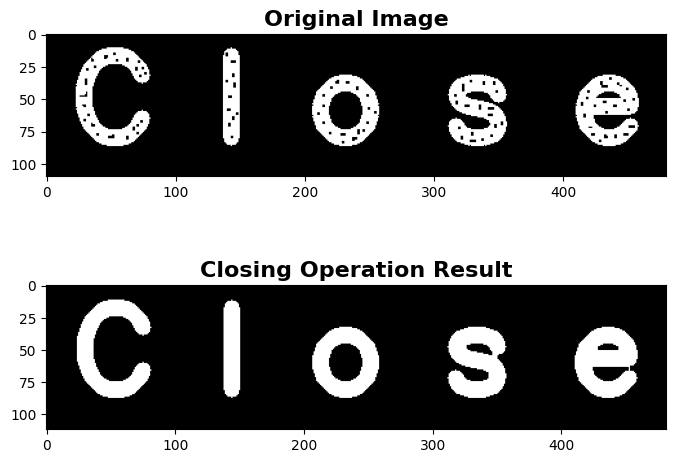

In [3]:
# 3.1 Morphology Closing-------------------------------------------------

class Q31():
    def Morphology_Closing(self):
        print("3.1 Buttom clicked")
        image = cv2.imread('/kaggle/input/dataset-opencvdl-hw2/Dataset_OpenCvDl_Hw2/Dataset_OpenCvDl_Hw2/Q3/closing.png')

        if image is not None:
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Binary for 0 and 255
            threshold = 127
            binary_image = (gray_image > threshold).astype(np.uint8) * 255

            # Pad the image with zeros based on the kernel size (K=3)
            kernel_size = 3
            padded_image = np.pad(binary_image, pad_width=kernel_size // 2, mode='constant', constant_values=0)
            '''
            np.pad(...): 用於在陣列的邊緣填充數值（padding），「需要填充的寬度，等於 kernel_size 的一半」
                pad_width = kernel_size // 2: 填充的寬度 = 1。表示影像的每個邊緣（上、下、左、右）都填充 1 個像素寬度的邊框
                mode='constant': 用一個固定的數值來填充
                constant_values=0: 指定了填充邊緣的常數值為 0。
            '''

            # Define a 3x3 all-ones structuring element aka. Convolution kernel
            structuring_element = np.ones((kernel_size, kernel_size), dtype=np.uint8)

            # dilation operation
            dilated_image = np.zeros_like(padded_image)
            for i in range(kernel_size // 2, padded_image.shape[0] - kernel_size // 2):
                for j in range(kernel_size // 2, padded_image.shape[1] - kernel_size // 2):
                    dilated_image[i, j] = np.max(padded_image[i - kernel_size // 2:i + kernel_size // 2 + 1,
                                                             j - kernel_size // 2:j + kernel_size // 2 + 1] * structuring_element)
            # erosion operation
            eroded_image = np.zeros_like(dilated_image)
            for i in range(kernel_size // 2, dilated_image.shape[0] - kernel_size // 2):
                for j in range(kernel_size // 2, dilated_image.shape[1] - kernel_size // 2):
                    eroded_image[i, j] = np.min(dilated_image[i - kernel_size // 2:i + kernel_size // 2 + 1,
                                                            j - kernel_size // 2:j + kernel_size // 2 + 1] * structuring_element)

            plt.figure(figsize=(8, 6))

            plt.subplot(2, 1, 1)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title('Original Image',fontsize=16, fontweight="bold")

            plt.subplot(2, 1, 2)
            plt.imshow(cv2.cvtColor(eroded_image, cv2.COLOR_BGR2RGB))
            plt.title('Closing Operation Result',fontsize=16, fontweight="bold")

            plt.show()

        else:
            print("請先選擇圖片")

q31 = Q31()
q31.Morphology_Closing()


3.2 Buttom clicked


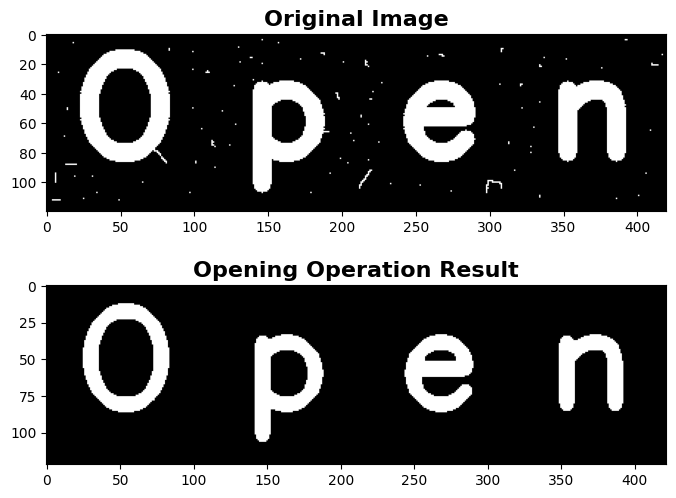

In [4]:
# 3.2 Morphology Opening-------------------------------------------------

class Q32():
    def Morphology_Opening(self):
        print("3.2 Buttom clicked")
        image = cv2.imread('/kaggle/input/dataset-opencvdl-hw2/Dataset_OpenCvDl_Hw2/Dataset_OpenCvDl_Hw2/Q3/opening.png')

        if image is not None:
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Binary for 0 and 255
            threshold = 127
            binary_image = (gray_image > threshold).astype(np.uint8) * 255

            # Pad the image with zeros based on the kernel size (K=3)
            kernel_size = 3
            padded_image = np.pad(binary_image, pad_width=kernel_size // 2, mode='constant', constant_values=0)

            # Define a 3x3 all-ones structuring element aka. Convolution kernel
            structuring_element = np.ones((kernel_size, kernel_size), dtype=np.uint8)

            # erosion operation
            eroded_image = np.zeros_like(padded_image)
            for i in range(kernel_size // 2, padded_image.shape[0] - kernel_size // 2):
                for j in range(kernel_size // 2, padded_image.shape[1] - kernel_size // 2):
                    eroded_image[i, j] = np.min(padded_image[i - kernel_size // 2:i + kernel_size // 2 + 1,
                                                            j - kernel_size // 2:j + kernel_size // 2 + 1] * structuring_element)

            # dilation operation
            dilated_image = np.zeros_like(eroded_image)
            for i in range(kernel_size // 2, eroded_image.shape[0] - kernel_size // 2):
                for j in range(kernel_size // 2, eroded_image.shape[1] - kernel_size // 2):
                    dilated_image[i, j] = np.max(eroded_image[i - kernel_size // 2:i + kernel_size // 2 + 1,
                                                             j - kernel_size // 2:j + kernel_size // 2 + 1] * structuring_element)

            plt.figure(figsize=(8, 6))

            plt.subplot(2, 1, 1)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title('Original Image',fontsize=16, fontweight="bold")

            plt.subplot(2, 1, 2)
            plt.imshow(cv2.cvtColor(eroded_image, cv2.COLOR_BGR2RGB))
            plt.title('Opening Operation Result',fontsize=16, fontweight="bold")

            plt.show()

        else:
            print("請先選擇圖片")

q32 = Q32()
q32.Morphology_Opening()
